In [1]:
# Importing Libraries

import numpy as np
from sklearn.model_selection import train_test_split
from scipy import optimize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#Creating Data

true_thetas = np.array([0.1,2.5,0.5])    #intercept,theta 1, theta 2 (plane)   - data will lie on that plane.
x = np.random.normal(1.5,1,size = (1000,2))      #first argument is mean of normal distribution and second argument is standard deviation
noise = np.random.normal(0.01,0.05,size = (1000,1))    #creating noise

In [3]:
# Appending a column of Ones to x

ones = [1] *1000        # it will create vector of one of length 500
ones = np.array(ones)
ones = ones[:,np.newaxis]      #converting a 0-d array to 1-d array with one column.
print(ones.shape)
data = np.append(ones,x,axis = 1)    #appending vector one to x vector so that ones column comes first
data.shape

(1000, 1)


(1000, 3)

In [4]:
print(data)

[[ 1.         -0.03264693  1.34675357]
 [ 1.          0.88003835  2.03256683]
 [ 1.          2.94386479 -0.10015524]
 ...
 [ 1.          1.63562175  1.29675575]
 [ 1.          0.85486181  0.95076051]
 [ 1.          2.17297049 -0.54863248]]


In [5]:
noise.shape

(1000, 1)

## Defining the Sigmoid function

In [6]:
def sigmoid(weights,x):
    temp = np.dot(x,true_thetas.T)[:,np.newaxis] 
    y = 1/(1+np.exp(-temp))
    return y
   # y = 1/np.exp(1+temp)
    #val = 1/(1+np.exp(-z)
#def sigmoid(z):
       # val = 1/(1+np.exp(-z))
        #return val
       

In [7]:
#y_prob = sigmoid(true_thetas,data)
#print(y_prob.shape)

In [8]:
y_prob = sigmoid(true_thetas,data) +noise
print(y_prob.shape)

(1000, 1)


In [9]:
print(y_prob)     #these values corresponds to probability. (belongs to which class)

[[0.60863464]
 [0.96690687]
 [0.95073093]
 [0.88585675]
 [0.9617351 ]
 [0.76515849]
 [1.05260968]
 [0.90113189]
 [0.94787742]
 [0.72474866]
 [0.61324294]
 [1.09539809]
 [0.99683152]
 [0.977287  ]
 [0.39722968]
 [0.85096941]
 [0.97383955]
 [0.83842996]
 [1.06520095]
 [0.95012609]
 [0.87762514]
 [1.01931057]
 [0.86887817]
 [1.02977915]
 [0.74350655]
 [1.02192803]
 [1.00785059]
 [1.03257064]
 [1.04695937]
 [1.08032593]
 [1.08007458]
 [0.67259098]
 [0.99188884]
 [0.96741152]
 [0.97341536]
 [0.72347074]
 [0.98883309]
 [0.9839997 ]
 [0.79367198]
 [0.99328863]
 [1.0572302 ]
 [1.02042796]
 [1.00971423]
 [1.06680532]
 [0.94708669]
 [0.91284873]
 [1.02411742]
 [0.97904081]
 [1.03889998]
 [0.98676286]
 [0.8935913 ]
 [0.99549239]
 [0.98199845]
 [1.05462509]
 [1.01068884]
 [1.06215184]
 [1.00487477]
 [1.01886145]
 [0.94457586]
 [1.02148532]
 [0.9512521 ]
 [1.01761184]
 [0.99909761]
 [1.04775931]
 [0.97964073]
 [1.02831947]
 [1.04668613]
 [0.98408668]
 [0.20248042]
 [1.0113346 ]
 [1.0083507 ]
 [0.90

In [10]:
y = [1 if val> 0.5 else 0 for val in y_prob.ravel()]
y = np.array(y)
print(y)     #mapped to all o's and 1's

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [11]:
#checking the count of zeros and ones:

from collections import Counter
print(Counter(y))

Counter({1: 959, 0: 41})


This is known as class imbalance problem. this means the number of data points belonging to one class is far larger than the number of data points belonging to the other class.

To tackle of the problem of class imbalance, we often use sampling as a method to either increase the population of the minority class(over sampling) or reduce the population of the majority class.(under sampling)

Random Oversampling : In this case, we randomly sample from the minority class with replacement i.e., every point belonging to the minority class has an equal likelihood of being selected.

Random undersampling: In this case, we randomly remove some data points from the majority class i.e., every point of the majority class has an equal likelihood of being removed.

**Sampling Strategies** : is the ratio of the population size of the minority class after resampling  / population size of majority class

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 0.6,random_state = 42)
x_sample,y_sample = ros.fit_resample(data,y)
print(Counter(y_sample))                        

Counter({1: 959, 0: 575})


In [17]:
print(575/959)    #close to .6, what we wanted after sampling

0.5995828988529719


In [19]:
# Splitting the data :

x_train,x_test,y_train,y_test = train_test_split(x_sample,y_sample,test_size=0.2,random_state=0)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1227, 3)
(307, 3)
(1227,)
(307,)


***Fitting the Model***

In [21]:
#Gradient

def gradient(weights,x,y):
    m = y.shape[0]
    #weights = np.array(weights)[:np.newaxis]
    #print(weights.shape)
    #y_prob = sigmoid(np.dot(x,weights))
    y_prob = sigmoid(weights,x) 
    y = np.array(y).reshape(m,1)
  
    gradient = np.dot((y_prob - y).T,x)/m
    return gradient

Cost Function : It is the function to be minimized. In the case of logistic regression, it is the log loss (Binary classification)

Gradient : It is a vector that contains the partial derivative of the cost function with respect to each of the model parameters.

Gradient Descent : It is an optimization technique used to converge to the global minimum of the cost function given a starting value for the model parameters. GD reaches the optimal solution (global minimum) by moving in the direction opposite to the gradient.

In [22]:
#Cost Function : log loss

def cost(weights,x,y):
    m = y.shape[0]
    #y_prob = sigmoid(np.dot(x,weights))
    y_prob = sigmoid(weights,x) 
    loss = -(1/m) * np.sum(y * np.log(y_pred+1e-7) + (1 - y) * np.log(1 - y_pred+1e-7))
    return loss

In [23]:
#gradient descent

def gradient_descent(x,y,initial_weights,num_iterations,lr):
    weights = initial_weights
    for _ in range(num_iterations):
        grad = gradient(weights,x,y)
        weights = weights-(lr*grad)
    
    return weights

In [24]:
initial_weights = [0,0,0]
num_iterations = 60
lr = 0.05

In [25]:
fitted_params = gradient_descent(x_train,y_train,initial_weights,num_iterations,lr)


In [26]:
print(fitted_params)

[[-0.24653755  0.20352436 -0.22097399]]


In [27]:
print(true_thetas)

[0.1 2.5 0.5]


In [28]:
# Predictions:

def predicted_probabilities(x,pred_weights):
    return sigmoid(pred_weights,x)
   
#returns the probabilities of each point in the dataset given the predicted weights.

In [29]:
def predict(x,pred_weights,threshold):
    y_prob = sigmoid(pred_weights,x)
    y = [1 if val> threshold else 0 for val in y_prob.ravel()]
    y = np.array(y)
    return y

In [30]:
ytrain_pred =  predict(x_train,fitted_params,0.5)

In [31]:
print(ytrain_pred)

[1 1 0 ... 0 1 1]


In [32]:
ytest_pred =  predict(x_test,fitted_params,0.5)
print(ytest_pred)

[1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 0]


In [39]:
ytest_prob = predicted_probabilities(x_test,fitted_params)

In [40]:
print(ytest_prob)

[[0.988288  ]
 [0.19703817]
 [0.29618767]
 [0.99844403]
 [0.94607476]
 [0.49520125]
 [0.1995256 ]
 [0.99116669]
 [0.20274955]
 [0.49520125]
 [0.68265946]
 [0.9983373 ]
 [0.37903207]
 [0.99759966]
 [0.99973261]
 [0.82343335]
 [0.9983189 ]
 [0.4292964 ]
 [0.99431546]
 [0.37856372]
 [0.13076063]
 [0.99273671]
 [0.99831673]
 [0.99268685]
 [0.97228454]
 [0.9879171 ]
 [0.19650287]
 [0.99145244]
 [0.90875405]
 [0.21286436]
 [0.13076063]
 [0.99132536]
 [0.92858833]
 [0.10954251]
 [0.98703959]
 [0.31767103]
 [0.13076063]
 [0.41224382]
 [0.99947126]
 [0.99338016]
 [0.98698848]
 [0.99874676]
 [0.49520125]
 [0.98124558]
 [0.67640791]
 [0.99930428]
 [0.36041869]
 [0.33518045]
 [0.39205318]
 [0.79750092]
 [0.36041869]
 [0.99396311]
 [0.31767103]
 [0.07294542]
 [0.36041869]
 [0.99535255]
 [0.36041869]
 [0.99692674]
 [0.99950003]
 [0.98918898]
 [0.97108846]
 [0.99969345]
 [0.49520125]
 [0.99201274]
 [0.33518045]
 [0.99949479]
 [0.46919695]
 [0.99834313]
 [0.97897429]
 [0.20527435]
 [0.21286436]
 [0.47

Accuracy

In [33]:
#for training

from sklearn.metrics import accuracy_score
print(f'The Accuracy on the train set is: {accuracy_score(y_train,ytrain_pred)}')

The Accuracy on the train set is: 0.986960065199674


In [34]:
#for testing

print(f'The Accuracy on the test set is: {accuracy_score(y_test,ytest_pred)}')

The Accuracy on the test set is: 0.993485342019544


   Balanced Accuracy

In [35]:
from sklearn.metrics import balanced_accuracy_score

In [36]:
#for training

from sklearn.metrics import accuracy_score
print(f'The Balanced Accuracy on the train set is: {balanced_accuracy_score(y_train,ytrain_pred)}')

The Balanced Accuracy on the train set is: 0.9837252119860815


In [37]:
#for testing

print(f'The Balanced Accuracy on the test set is: {balanced_accuracy_score(y_test,ytest_pred)}')

The Balanced Accuracy on the test set is: 0.9906542056074766


**ROC CURVE** : shows the performance of the classification model at different classification threshold. It is a graph between the true positive rate and the false positive rate.

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

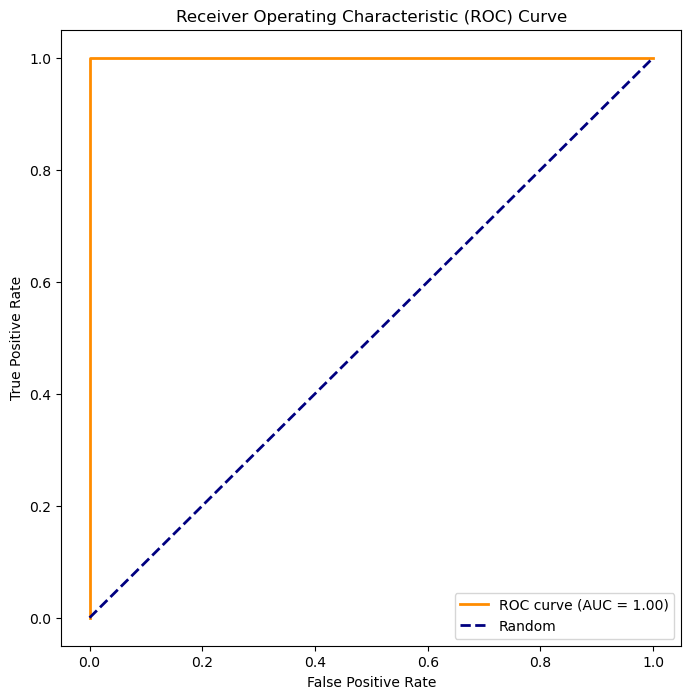

In [43]:
#  Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test,ytest_prob)
 
# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
 
# Step 7: Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

        The high value of the area under the ROC curve shows that logistic regression works well for this data. However we 
        may not obtain a perfect ROC curve for real life data.